importing dataset


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


importing libraries


In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

data preprocessing


training image preprocessing


In [7]:
training_set=tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruit_vegetable_dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)


Found 3116 files belonging to 36 classes.


#validation image preprocessing


In [8]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruit_vegetable_dataset/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 351 files belonging to 36 classes.


Building Model


In [9]:
cnn=tf.keras.models.Sequential()


BUILDING CONVOLUTION LAYER



In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Flatten())

In [13]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))#to create neurons


In [14]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))#to create neurons

In [15]:
cnn.add(tf.keras.layers.Dropout(0.5))#to avoid overfitting


In [16]:
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))#output layer

Compiling and Training Phase

In [17]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 60, 60, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       5,538,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,744,452 (21.91 MB)

 Trainable params: 5,744,452 (21.91 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
training_history=cnn.fit(x=training_set,validation_data=validation_set,epochs=34)



Epoch 1/34
98/98 ━━━━━━━━━━━━━━━━━━━━ 608s 6s/step - accuracy: 0.0302 - loss: 10.8310 - val_accuracy: 0.0370 - val_loss: 3.5711
Epoch 2/34
98/98 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.0347 - loss: 3.5715 - val_accuracy: 0.0570 - val_loss: 3.4815
Epoch 3/34
98/98 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.0476 - loss: 3.5059 - val_accuracy: 0.1083 - val_loss: 3.2732
Epoch 4/34
98/98 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.0961 - loss: 3.3029 - val_accuracy: 0.0826 - val_loss: 3.4475
Epoch 5/34
98/98 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.0988 - loss: 3.2124 - val_accuracy: 0.2479 - val_loss: 2.7499
Epoch 6/34
98/98 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.1781 - loss: 2.8811 - val_accuracy: 0.4387 - val_loss: 2.2165
Epoch 7/34
98/98 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.2518 - loss: 2.6008 - val_accuracy: 0.5157 - val_loss: 1.8508
Epoch 8/34
98/98 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.3448 - loss: 2.3385 - val_accuracy: 0.5812 - 

##Saving Model



In [24]:
cnn.save('trained_model.h5')

In [25]:
training_history.history #it will return dictionary of history

{'accuracy': [0.0292041078209877,
  0.035943515598773956,
  0.05616174638271332,
  0.09980744868516922,
  0.12708601355552673,
  0.20154044032096863,
  0.2814505696296692,
  0.3703466057777405,
  0.4547496736049652,
  0.5051347613334656,
  0.5503851175308228,
  0.598523736000061,
  0.6299743056297302,
  0.6672015190124512,
  0.7086007595062256,
  0.7310654520988464,
  0.7727856040000916,
  0.7936456799507141,
  0.8145057559013367,
  0.8308728933334351,
  0.8623234629631042,
  0.8732349276542664,
  0.8751604557037354,
  0.8940950036048889,
  0.9114248752593994,
  0.9181643128395081,
  0.9178434014320374,
  0.912708580493927,
  0.9245827794075012,
  0.9287548065185547,
  0.9457638263702393,
  0.9502567648887634,
  0.9496148824691772,
  0.9476893544197083],
 'loss': [5.415801048278809,
  3.5646796226501465,
  3.4699995517730713,
  3.2578470706939697,
  3.1088900566101074,
  2.814220666885376,
  2.5317463874816895,
  2.249990940093994,
  1.9297398328781128,
  1.7230207920074463,
  1.589704

Recording history


In [26]:
import json
with open('training_history.json', 'w')as f:
  json.dump(training_history.history,f)

Calculating accuracy of model achieved on validation set


In [27]:
print("Validation set accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set accuracy: 92.87749528884888 %


In [28]:
print("accuracy: {} %".format(training_history.history['accuracy'][-1]*100))

accuracy: 94.76893544197083 %


#accuracy visualization


#training visualization


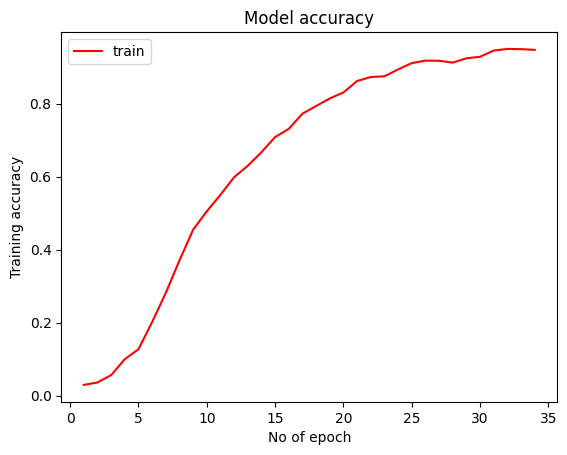

In [29]:
epoch=[i for i in range(1,35)]
plt.plot(epoch,training_history.history['accuracy'],color='red')
plt.title('Model accuracy')
plt.ylabel('Training accuracy')
plt.xlabel('No of epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

#validation accuracy


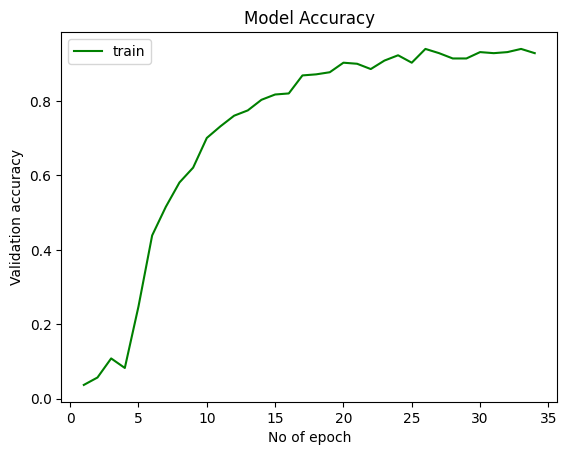

In [30]:
plt.plot(epoch,training_history.history['val_accuracy'],color='green')
plt.title('Model Accuracy')
plt.ylabel('Validation accuracy')
plt.xlabel('No of epoch')
plt.legend(['train','validation'],loc='upper left')